In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [24]:
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

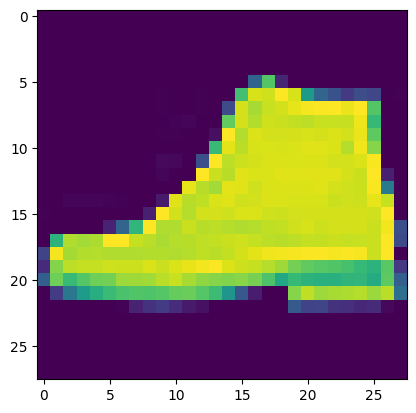

In [4]:
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

In [5]:
# Normalizing images
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4944 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3741 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3346 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3107 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2931 - accuracy: 0.8917


In [8]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3766 - accuracy: 0.8691


[0.37664544582366943, 0.8690999746322632]

In [9]:
classifications = model.predict(testing_images)
print(f"Prediction: -\n{classifications[0]}")
print(f"Actual: -\n{testing_labels[0]}")

313/313 [==============================] - 1s 3ms/step
Prediction: -
[9.09377150e-07 5.64914124e-08 1.31892682e-06 6.60805881e-07
 7.05004868e-06 6.24660496e-03 1.77226445e-06 1.13901645e-01
 4.44970792e-05 8.79795492e-01]
Actual: -
9


In [10]:
class MyCallback(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold):
        self.threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > self.threshold:
            print(f"\nReached {self.threshold * 100}% accuracy so cancelling training")
            self.model.stop_training = True

callback = MyCallback(accuracy_threshold = 0.90)

In [11]:
# Using callbacks

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(training_images, training_labels, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5029 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3777 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3409 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3160 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8995
Epoch 8/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.9051
Reached 90.0% accuracy so cancelling training
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2585 - accuracy: 0.9051


In [50]:
# Model using Convolution Filters (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()
model.fit(training_images, training_labels, epochs=2)
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy * 100}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [68]:
# FASHION_ITEM = 9 # Ankle Boot
# FASHION_ITEM = 8 # Bag
# FASHION_ITEM = 7 # Sneaker
# FASHION_ITEM = 6 # Shirt
# FASHION_ITEM = 5 # Sandal
# FASHION_ITEM = 4 # Coat
# FASHION_ITEM = 3 # Dress
# FASHION_ITEM = 2 # Pullover
FASHION_ITEM = 1 # Trouser
# FASHION_ITEM = 0 # T-shirt/top
indices = [i for i, val in zip(range(len(testing_labels)), testing_labels==FASHION_ITEM) if val]
indices[:10]

[2, 3, 5, 15, 24, 41, 47, 64, 65, 76]

In [69]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

FIRST_IMAGE=indices[0]
SECOND_IMAGE=indices[1]
THIRD_IMAGE=indices[2]
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

In [70]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
f = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1)) # Output of each layer for specified image
print(f"type(f): {type(f)}") # List of
print(f"len(f): {len(f)}") # Length 6, i.e. 6 layers
print(f"type(f[0]): {type(f[0])}") #ndarray of shape specified in the 'layer_outputs' for first layer
print(f"f[0].shape: {f[0].shape}") #ndarray of shape...
print(f"f[1].shape: {f[1].shape}") #...
print(f"f[2].shape: {f[2].shape}") #...
print(f"f[3].shape: {f[3].shape}") #... working with the first four layers to see how convolution works

1/1 [==============================] - 0s 68ms/step
type(f): <class 'list'>
len(f): 7
type(f[0]): <class 'numpy.ndarray'>
f[0].shape: (1, 26, 26, 32)
f[1].shape: (1, 13, 13, 32)
f[2].shape: (1, 11, 11, 32)
f[3].shape: (1, 5, 5, 32)


1/1 [==============================] - 0s 19ms/step


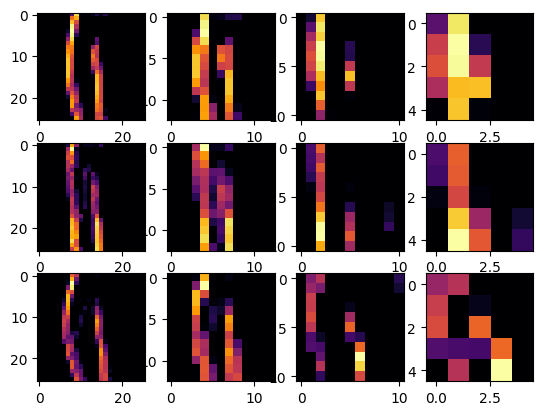

In [71]:
# VISUALIZING CONVOLUTIONS
CONVOLUTION_NUMBER = 6 # 6th filter out of the 32 filters will be visualized
f, axarr = plt.subplots(3,4)
for i in range(0, 4): # Iterate over the output layers
    f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[i] # Output of the ith layer
    axarr[0, i].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[i]
    axarr[1, i].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[i]
    axarr[2, i].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')